In [ ]:
!pip install ThinkBayes2

"""This file contains code used in "Think Stats",
by Allen B. Downey, available from greenteapress.com
Copyright 2015 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function, division

import numpy
import thinkbayes2
import thinkplot


"""
This problem presents a solution to the "Bayesian Billiards Problem"
Based on the formulation in this paper:
http://www.nature.com/nbt/journal/v22/n9/full/nbt0904-1177.html
Of a problem originally posed by Bayes himself.
"""

class Billiards(thinkbayes2.Suite):

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        data: tuple (#wins, #losses)
        hypo: float probability of win
        """
        p = hypo
        win, lose = data
        like = p**win * (1-p)**lose
        return like


def ProbWinMatch(pmf):
    total = 0
    for p, prob in pmf.Items():
        total += prob * (1-p)**3
    return total


def main():
    ps = numpy.linspace(0, 1, 101)
    bill = Billiards(ps)
    bill.Update((5, 3))
    thinkplot.Pdf(bill)
    thinkplot.Save(root='billiards1',
                   xlabel='probability of win',
                   ylabel='PDF',
                   formats=['png'])

    bayes_result = ProbWinMatch(bill)
    print('Bayesian Odd Ratio',thinkbayes2.Odds(1-bayes_result))
    print('Bayesian Prob',bayes_result)
    
    
    mle = 5 / 8
    freq_result = (1-mle)**3
    print('Freq Odd Ratio',thinkbayes2.Odds(1-freq_result))
    print('Freq Prob',freq_result)

    
if __name__ == '__main__':
    main()

No handles with labels found to put in legend.


Writing billiards1.png
Bayesian Odd Ratio 10.000000461999754
Bayesian Prob 0.09090908709091122
Freq Odd Ratio 17.962962962962962
Freq Prob 0.052734375


<Figure size 576x432 with 0 Axes>

In [ ]:
# Another way, using Monte Carlo simulations:

import numpy as np
#np.random.seed(0)

# play 100000 games with randomly-drawn p, between 0 and 1
p = np.random.random(100000)

# each game needs at most 11 rolls for one player to reach 6 wins
rolls = np.random.random((11, len(p)))

# count the cumulative wins for Alice and Bob at each roll
Alice_count = np.cumsum(rolls < p, 0)
Bob_count = np.cumsum(rolls >= p, 0)

# sanity check: total number of wins should equal number of rolls
total_wins = Alice_count + Bob_count
assert np.all(total_wins.T == np.arange(1, 12))

# determine number of games which meet our criterion of (A wins, B wins)=(5, 3)
# this means Bob's win count at eight rolls must equal 3
good_games = Bob_count[7] == 3
print("Number of suitable games: {0}".format(good_games.sum()))

# truncate our results to consider only these games
Alice_count = Alice_count[:, good_games]
Bob_count = Bob_count[:, good_games]

# determine which of these games Bob won.
# to win, he must reach six wins after 11 rolls.
bob_won = np.sum(Bob_count[10] == 6)
print("Number of these games Bob won: {0}".format(bob_won.sum()))

# compute the probability
mc_prob = bob_won.sum() * 1. / good_games.sum()
print("Monte Carlo Probability of Bob winning: {0:.2f}".format(mc_prob))
print("MC Odds against Bob winning: {0:.0f} to 1".format((1. - mc_prob) / mc_prob))

(Sanity check passed)
Number of suitable games: 10892
Number of these games Bob won: 1006
Monte Carlo Probability of Bob winning: 0.09
MC Odds against Bob winning: 10 to 1


In [ ]:
#Running m repetitions and reporting in figure:
import matplotlib.pyplot as plt

def AliceBobGame(m):
  mc_prob_vector=np.zeros(m)
  for i in range(m):     
    p = np.random.random(100000)
    rolls = np.random.random((11, len(p)))
    Alice_count = np.cumsum(rolls < p, 0)
    Bob_count = np.cumsum(rolls >= p, 0)
    total_wins = Alice_count + Bob_count
    assert np.all(total_wins.T == np.arange(1, 12))
    good_games = Bob_count[7] == 3
    Alice_count = Alice_count[:, good_games]
    Bob_count = Bob_count[:, good_games]
    bob_won = np.sum(Bob_count[10] == 6)
    # compute the probability
    mc_prob_vector[i] = bob_won.sum() * 1. / good_games.sum()

  x=range(m)
  plt.ylim(0, 1)
  plt.plot(x,mc_prob_vector)
  plt.ylabel('Probability of Bob winning')
  plt.show()
  
  return mc_prob_vector


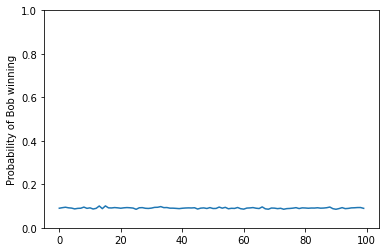

[0.0900215  0.09252127 0.09461142 0.0918668  0.09062275 0.08691732
 0.08935018 0.09002544 0.09519533 0.08944705 0.09177473 0.08643976
 0.08955762 0.10033264 0.08805479 0.10071616 0.09170068 0.09127881
 0.09301066 0.09180149 0.09000709 0.09192301 0.09298753 0.09214584
 0.09074701 0.08506298 0.09204945 0.09276058 0.08976221 0.08903493
 0.09066957 0.09395121 0.09436848 0.09746928 0.09270571 0.09315589
 0.09029223 0.0902709  0.08930649 0.0881982  0.08993807 0.09099857
 0.09156065 0.09121377 0.09217549 0.08633223 0.09041738 0.09150152
 0.08880963 0.09289041 0.08874439 0.08903619 0.09532744 0.0902784
 0.09411446 0.08748536 0.0897367  0.08910891 0.09332857 0.08780664
 0.0858209  0.09071524 0.09143467 0.09296256 0.09006183 0.08860759
 0.09612984 0.08739435 0.08547009 0.09094158 0.09039345 0.0881233
 0.08974475 0.08531782 0.08827786 0.08905096 0.09042411 0.09262693
 0.08852845 0.09164839 0.09112192 0.08999286 0.09095836 0.09078566
 0.09213563 0.09027778 0.09085241 0.09238351 0.09546067 0.087876

In [ ]:
# 100 repetitions
mc_prob_vector=AliceBobGame(100)
print(mc_prob_vector)
print('Mean',np.mean(mc_prob_vector))

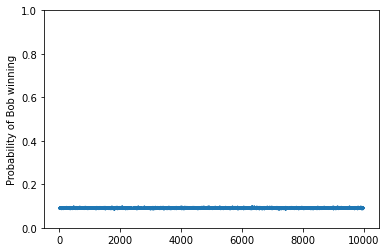

Mean 0.09091359962605433


In [ ]:
# 10000 repetitions (this will take longer)
mc_prob_vector2=AliceBobGame(10000)
print('Mean',np.mean(mc_prob_vector2))